In [82]:
import argparse
import colorsys
import csv

import pandas as pd
import matplotlib.pyplot as plt
from numpy import dtype
import math
import sys
sys.path.append("../../../../../../../")
from algorithm.per_item import Accuracy_workload as workload
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

In [83]:
import os
os.getcwd()


'/Users/jinyangli/OngoingProjects/dynamic_fairness/DFMonitor/experiments/stocks/stock_nanosecond/dynamic_method_fixed_window/compare_acc_change_window_size/alpha_99995'

In [126]:

def get_integer(alpha):
    while not math.isclose(alpha, round(alpha), rel_tol=1e-9):  # Use a small tolerance
        alpha *= 10
    return int(alpha)



time_period = "14-00--14-10"
date = "20241015"
len_chunk = 1
# Prepare the result file for writing

alpha = 0.99995


threshold = 0.4
label_prediction = "predicted_direction"
label_ground_truth = "next_price_direction"
correctness_column = "prediction_binary_correctness"
use_two_counters = True
time_unit = "10000 nanosecond"
# window_size_units = "10"
checking_interval = "100000 nanosecond"
use_nanosecond = True
window_size_unit = 500


time_start = pd.Timestamp('2024-10-15 14:00:10.50', tz='UTC')
time_end = pd.Timestamp('2024-10-15 14:00:11.50', tz='UTC')


fixed_window_file_name = f"check_interval_100000/stocks_compare_Accuracy_sector_20241015_14-00--14-10_alpha_{str(get_integer(alpha))}_time_unit_{time_unit}*{window_size_unit}_check_interval_{checking_interval}_start_time_" \
            f"{time_start}_end_time_{time_end}.csv"



Tin = 400
Tb = 600
adaptive_file_name = f"../../../dynamic_method_adaptive_window/compare_acc_change_Tb/alpha_99995/stocks_compare_Accuracy_sector_{date}_{time_period}_alpha_{str(get_integer(alpha))}" + \
            f"_time_unit_{time_unit}_check_interval_{checking_interval}_Tin_{Tin}_Tb_{Tb}" + \
             f"_start_time_{time_start}_end_time_{time_end}.csv"





In [127]:
fixed_window_result = pd.read_csv(fixed_window_file_name)

print(len(fixed_window_result))

fixed_window_result["check_points"] = pd.to_datetime(fixed_window_result["check_points"])

print(len(fixed_window_result))

print("number of reset times: ", len(fixed_window_result[fixed_window_result["window_reset"] == "reset"]))


9958
9958
number of reset times:  199


In [129]:
adaptive_window_result = pd.read_csv(adaptive_file_name)

print(len(adaptive_window_result))

adaptive_window_result["check_points"] = pd.to_datetime(adaptive_window_result["check_points"])

print(len(adaptive_window_result))

print("number of reset times: ", len(adaptive_window_result[adaptive_window_result["window_reset"] == "reset"]))

10102
10102
number of reset times:  144


In [130]:
# compare checkpoints where column window_reset has value "reset"

fixed_window_reset = fixed_window_result[fixed_window_result["window_reset"] == "reset"]
print(len(fixed_window_reset))
dynamic_window_reset = adaptive_window_result[adaptive_window_result["window_reset"] == "reset"]
print(len(dynamic_window_reset))

199
144


# compare the fixed_window_reset and dynamic window reset

In [131]:
# Merge the two reset DataFrames on `check_points` to compare where resets align or differ
comparison_df = pd.merge(
    fixed_window_reset[['check_points', 'window_reset']],
    dynamic_window_reset[['check_points', 'window_reset']],
    on="check_points",
    how="outer",
    suffixes=('_fixed', '_dynamic')
)

# Add a column to show if the reset status matches between the two
comparison_df['reset_match'] = comparison_df['window_reset_fixed'] == comparison_df['window_reset_dynamic']

# Check results
print(comparison_df)

# Separate out mismatches for further analysis if needed
mismatches = comparison_df[comparison_df['reset_match'] == False]
print("Mismatches:")
print(mismatches)
mismatch_file_name = f"mismatch_time_unit_{time_unit}_checking_interval_{checking_interval}_window_size_unit_{window_size_unit}_Tin_{Tin}_Tb_{Tb}.csv"
mismatches.to_csv(mismatch_file_name, index=False)


                           check_points window_reset_fixed  \
0   2024-10-15 14:00:10.507027418+00:00              reset   
1   2024-10-15 14:00:10.512027418+00:00              reset   
2   2024-10-15 14:00:10.515675487+00:00                NaN   
3   2024-10-15 14:00:10.517027418+00:00              reset   
4   2024-10-15 14:00:10.522027418+00:00              reset   
..                                  ...                ...   
338 2024-10-15 14:00:11.486464200+00:00                NaN   
339 2024-10-15 14:00:11.487027418+00:00              reset   
340 2024-10-15 14:00:11.492027418+00:00              reset   
341 2024-10-15 14:00:11.492135524+00:00                NaN   
342 2024-10-15 14:00:11.497027418+00:00              reset   

    window_reset_dynamic  reset_match  
0                    NaN        False  
1                    NaN        False  
2                  reset        False  
3                    NaN        False  
4                    NaN        False  
..             

In [132]:
mismatch = pd.read_csv(mismatch_file_name)
print(mismatch)

                            check_points window_reset_fixed  \
0    2024-10-15 14:00:10.507027418+00:00              reset   
1    2024-10-15 14:00:10.512027418+00:00              reset   
2    2024-10-15 14:00:10.515675487+00:00                NaN   
3    2024-10-15 14:00:10.517027418+00:00              reset   
4    2024-10-15 14:00:10.522027418+00:00              reset   
..                                   ...                ...   
338  2024-10-15 14:00:11.486464200+00:00                NaN   
339  2024-10-15 14:00:11.487027418+00:00              reset   
340  2024-10-15 14:00:11.492027418+00:00              reset   
341  2024-10-15 14:00:11.492135524+00:00                NaN   
342  2024-10-15 14:00:11.497027418+00:00              reset   

    window_reset_dynamic  reset_match  
0                    NaN        False  
1                    NaN        False  
2                  reset        False  
3                    NaN        False  
4                    NaN        False  
.. 

/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_96926/2058661376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_window_reset['batch_length'] = fixed_window_reset['check_points'].diff().dt.total_seconds()
/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_96926/2058661376.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_window_reset['batch_length'] = dynamic_window_reset['check_points'].diff().dt.total_seconds()


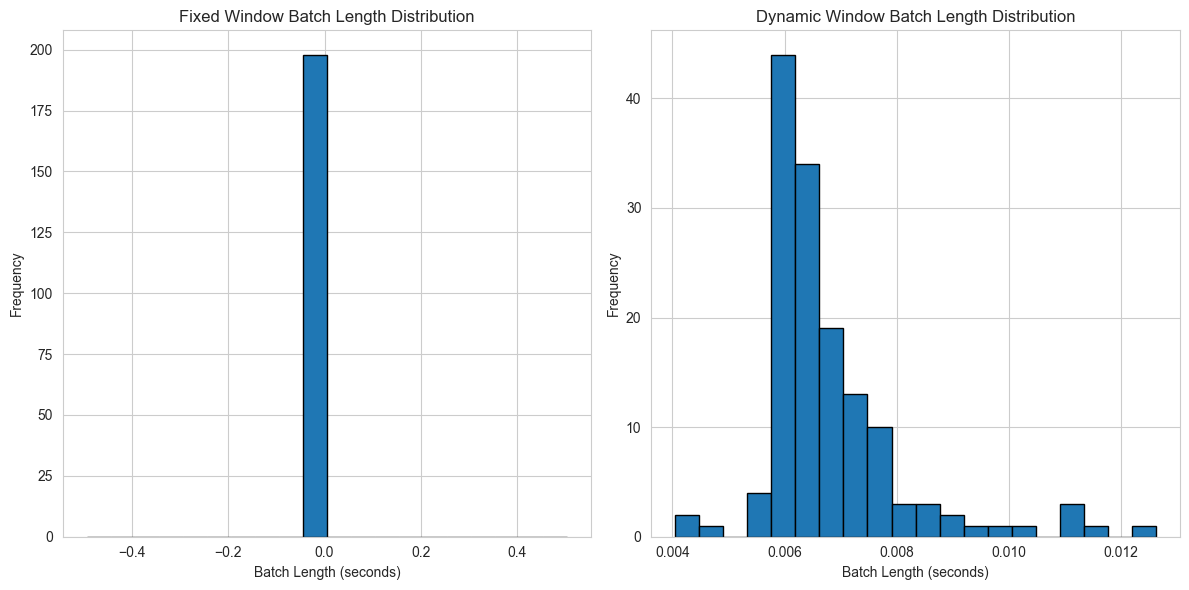

Fixed Window Batch Length Statistics:
count    1.980000e+02
mean     5.000000e-03
std      8.695604e-19
min      5.000000e-03
25%      5.000000e-03
50%      5.000000e-03
75%      5.000000e-03
max      5.000000e-03
Name: batch_length, dtype: float64

Dynamic Window Batch Length Statistics:
count    143.000000
mean       0.006828
std        0.001273
min        0.004051
25%        0.006105
50%        0.006452
75%        0.007102
max        0.012622
Name: batch_length, dtype: float64


In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate batch lengths for fixed_window_reset
fixed_window_reset['batch_length'] = fixed_window_reset['check_points'].diff().dt.total_seconds()
# Drop the first NaN value resulting from the diff operation
fixed_window_reset = fixed_window_reset.dropna(subset=['batch_length'])



# Calculate batch lengths for dynamic_window_reset
dynamic_window_reset['batch_length'] = dynamic_window_reset['check_points'].diff().dt.total_seconds()
dynamic_window_reset = dynamic_window_reset.dropna(subset=['batch_length'])

# Plot distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fixed_window_reset['batch_length'], bins=20, edgecolor='black')
plt.title("Fixed Window Batch Length Distribution")
plt.xlabel("Batch Length (seconds)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(dynamic_window_reset['batch_length'], bins=20, edgecolor='black')
plt.title("Dynamic Window Batch Length Distribution")
plt.xlabel("Batch Length (seconds)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print basic statistics for analysis
print("Fixed Window Batch Length Statistics:")
print(fixed_window_reset['batch_length'].describe())

print("\nDynamic Window Batch Length Statistics:")
print(dynamic_window_reset['batch_length'].describe())


 # compare fixed window results with different window sizes

In [137]:

def get_integer(alpha):
    while not math.isclose(alpha, round(alpha), rel_tol=1e-9):  # Use a small tolerance
        alpha *= 10
    return int(alpha)



time_period = "14-00--14-10"
date = "20241015"
len_chunk = 1
# Prepare the result file for writing

alpha = 0.99995


threshold = 0.4
label_prediction = "predicted_direction"
label_ground_truth = "next_price_direction"
correctness_column = "prediction_binary_correctness"
use_two_counters = True
time_unit = "10000 nanosecond"
# window_size_units = "10"
checking_interval = "100000 nanosecond"
use_nanosecond = True
window_size_unit1 = 200
window_size_unit2 = 800

time_start = pd.Timestamp('2024-10-15 14:00:8.00', tz='UTC')
time_end = pd.Timestamp('2024-10-15 14:00:11.00', tz='UTC')


fixed_window_file_name1 = f"check_interval_100000/stocks_compare_Accuracy_sector_20241015_14-00--14-10_alpha_{str(get_integer(alpha))}_time_unit_{time_unit}*{window_size_unit}_check_interval_{checking_interval}_start_time_" \
            f"{time_start}_end_time_{time_end}.csv"



fixed_window_file_name2 = f"check_interval_100000/stocks_compare_Accuracy_sector_20241015_14-00--14-10_alpha_{str(get_integer(alpha))}_time_unit_{time_unit}*{window_size_unit2}_check_interval_{checking_interval}_start_time_" \
            f"{time_start}_end_time_{time_end}.csv"

accuracy_fixed_window1 = pd.read_csv(fixed_window_file_name1)
accuracy_fixed_window2 = pd.read_csv(fixed_window_file_name2)

print(len(accuracy_fixed_window1))
print(len(accuracy_fixed_window2))



29994
29994


In [138]:

num_resets1 = len(accuracy_fixed_window1[accuracy_fixed_window1["window_reset"] == "reset"])
num_resets2 = len(accuracy_fixed_window2[accuracy_fixed_window2["window_reset"] == "reset"])
print("number of resets in fixed window with window size 200: ", num_resets1)
print("number of resets in fixed window with window size 800: ", num_resets2)



number of resets in fixed window with window size 200:  599
number of resets in fixed window with window size 800:  374


In [141]:
# Merge the two reset DataFrames on `check_points` to compare where resets align or differ
comparison_df = pd.merge(
    accuracy_fixed_window1,
    accuracy_fixed_window2,
    on="check_points",
    how="outer",
    suffixes=('_200', '_800')
)

print(comparison_df.describe())


# print the accuracy hange of all accuracy columns between two fixed window results
for index, row in comparison_df.iterrows():
    if row["window_reset_200"] == "reset":
        
        
        


       Technology_time_decay_200  CommunicationServices_time_decay_200  \
count               29994.000000                          29994.000000   
mean                    0.642341                              0.593376   
std                     0.021164                              0.049904   
min                     0.000000                              0.000000   
25%                     0.629990                              0.576289   
50%                     0.642061                              0.594056   
75%                     0.655514                              0.618640   
max                     0.809524                              1.000000   

       Energy_time_decay_200  ConsumerDefensive_time_decay_200  \
count           29994.000000                      29994.000000   
mean                0.576838                          0.625609   
std                 0.097770                          0.051985   
min                 0.000000                          0.506868   
25%

In [ ]:

for column in accuracy_fixed_window1.columns:
    if column not in ["check_points", "window_reset"]:
        comparison_df[column + "_match"] = comparison_df[column + "_200"] == comparison_df[column + "_800"]
        

# Separate out mismatches for further analysis if needed
mismatches = comparison_df[comparison_df['reset_match'] == False]
print("Mismatches:")
print(mismatches)



